# Particle Filters

Particle filters are a non-linear non-parametric Bayesian estimators.

In [2]:
%matplotlib inline

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # pretty graphics in matplotlib
sns.set_style("white")

Imagine a situation where a vehicle moves on the plane. It takes odometry measurements as range $r$ and change of heading $\Delta \theta$. The measurements are added with different noise sampled from the corresponding Normal Distribution. Each particle position is incremented according to the last position and the measured noisy odometry:

$x_{k+1} = x_k + r \cos(\theta_k)$

$y_{k+1} = y_k + r \sin(\theta_k)$

$\theta_{k+1} = \theta_k + \Delta \theta$

Notice the typical banana-shape that the particles acquire after several predictions without any update. All particles start at the ground truth position:

$\vec{x}_0 = (x_0, y_0, \theta_0) = (0,0,0)$.

The robot moves straight for $9m$, then turns 90 deg to the left and avances $6m$, finally it turns another 90 deg to the left and avances $9m$.

[]

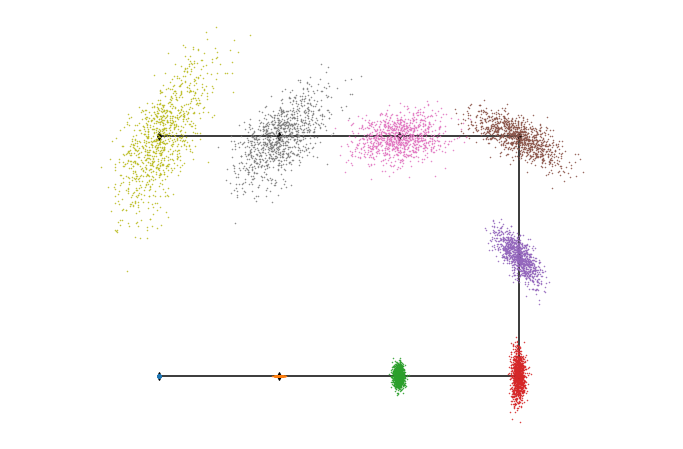

In [23]:
# Ground truth
hpi = np.pi / 2.0
fpi = np.pi
gx = [0.0, 3.0, 6.0, 9.0, 9.0, 9.0, 6.0, 3.0, 0.0]
gy = [0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 6.0, 6.0, 6.0]
ga = [0.0, 0.0, 0.0, hpi, hpi, fpi, fpi, fpi, fpi]

# Particles init
num = 1000
px = np.zeros(num)
py = np.zeros(num)
pa = np.zeros(num)
sigrng = 0.05
sigang = np.deg2rad(3.0)

# Particles sets
ps = list()
ps.append((px.copy(), py.copy()))

# Init plots
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plt.plot(gx, gy, 'kd-', ms=5, label="Ground truth")
plt.plot(px, py, '.', label="Particles at t={:d}".format(0))

# Move vehicle
for i in range(1, len(gx)):
    
    # True measurements
    rng = np.sqrt((gx[i] - gx[i-1])**2 + (gy[i] - gy[i-1])**2)
    ang = ga[i] - ga[i-1]
    
    # Noisy measurements
    rngs = rng + sigrng * np.random.randn(num)
    angs = ang + sigang * np.random.randn(num)
    
    # Move particles
    px += rngs * np.cos(pa)
    py += rngs * np.sin(pa)
    pa += angs
    
    # Save data
    ps.append((px.copy(), py.copy()))
    
    # Plot data
    # quiver(px, py, np.cos(pa), np.sin(pa), scale=40, width=0.01, headwidth=1, headaxislength=0.01)
    plt.plot(px, py, '.', ms=1, label="Particles at t={:d}".format(i))

# Ground truth
# plt.plot(gx, gy, 'kd-', ms=5, label="Ground truth")

# Legend
plt.axis('equal')
#plt.legend(loc="center right")
sns.despine(top=True, right=True, left=True, bottom=True)#, offset=20)
ax.set_xticklabels([])
ax.set_yticklabels([])

Weighted uncertainty:

$$s^2 = \frac{\sum{w_i}}{(\sum{w_i})^2 - \sum{(w_i)^2}} \sum{w_i(x - \mu)^2}$$